In [1]:
import tensorflow as tf
from tensorflow import keras

def create_network_2():
    model = keras.Sequential([
    keras.layers.Conv2D(filters=10,
                        kernel_size=3,
                        input_shape=(64, 64, 3),
                        activation="relu"
                        ),
    keras.layers.Conv2D(filters=10,
                        kernel_size=3,
                        activation="relu"
                        ),
    keras.layers.MaxPool2D(pool_size=2,
                           padding="same"),
    tf.keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=10,
                        kernel_size=3,
                        activation="relu"
                        ),
    keras.layers.Conv2D(filters=10,
                        kernel_size=3,
                        activation="relu"
                        ),
    keras.layers.MaxPool2D(pool_size=2,
                           padding="same"
                        ),
    tf.keras.layers.BatchNormalization(),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation=keras.activations.relu),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(3, activation=keras.activations.softmax)
    ])

    model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.00075),
            loss=keras.losses.categorical_crossentropy,
            metrics=[keras.metrics.CategoricalAccuracy()]
            )

    model.summary()

    return model

In [122]:
def create_network():
    model = keras.Sequential([
    keras.layers.Conv2D(filters=10,
                        kernel_size=3,
                        input_shape=(32, 32, 3),
                        activation="relu"
                        ),
    keras.layers.Conv2D(filters=10,
                        kernel_size=3,
                        activation="relu"
                        ),
    keras.layers.MaxPool2D(pool_size=2,
                           padding="valid"),
    keras.layers.Conv2D(filters=10,
                        kernel_size=3,
                        activation="relu"
                        ),
    keras.layers.Conv2D(filters=10,
                        kernel_size=3,
                        activation="relu"
                        ),
    keras.layers.MaxPool2D(pool_size=2,
                           padding="valid"
                        ),
    keras.layers.Flatten(),
    keras.layers.Dense(3, activation=keras.activations.softmax)
    ])

    model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0001),
            loss=keras.losses.categorical_crossentropy,
            metrics=[keras.metrics.CategoricalAccuracy()]
            )

    model.summary()

    return model


In [2]:
import tensorflow as tf

def create_data_generators(train_dir, val_dir, batch_size=32, target_size=(64, 64)):
    # Define data augmentation for training data
    train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
        rescale=1./255,  # Normalize pixel values to [0, 1]
        rotation_range=20,  # Randomly rotate images by up to 20 degrees
        width_shift_range=0.2,  # Randomly shift images horizontally by up to 20%
        height_shift_range=0.2,  # Randomly shift images vertically by up to 20%
        shear_range=0.2,  # Randomly shear images by up to 20%
        zoom_range=0.2,  # Randomly zoom in on images by up to 20%
        horizontal_flip=True,  # Randomly flip images horizontally
        fill_mode='nearest',  # Strategy for filling in newly created pixels
        preprocessing_function=lambda img: tf.keras.preprocessing.image.smart_resize(img, target_size)
    )

    # Define data augmentation for validation data (generally only rescaling)
    val_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
        rescale=1./255,  # Normalize pixel values to [0, 1]
        preprocessing_function=lambda img: tf.keras.preprocessing.image.smart_resize(img, target_size)
    )

    # Create training data generator
    train_generator = train_datagen.flow_from_directory(
        directory=train_dir,
        target_size=target_size,  # Resize images to target size
        batch_size=batch_size,
        class_mode='categorical'  # For multi-class classification
    )

    # Create validation data generator
    val_generator = val_datagen.flow_from_directory(
        directory=val_dir,
        target_size=target_size,  # Resize images to target size
        batch_size=batch_size,
        class_mode='categorical'  # For multi-class classification
    )

    return train_generator, val_generator


In [3]:
import matplotlib.pyplot as plt

def plot_training_history(history):
    """
    Plots the training and validation loss and accuracy from the model's history.
    
    Args:
        history: A `History` object from `model.fit()`.
    """
    # Extracting values from the history object
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    accuracy = history.history['categorical_accuracy']
    val_accuracy = history.history['val_categorical_accuracy']
    
    epochs = range(1, len(loss) + 1)

    # Plotting training and validation loss
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss, 'bo-', label='Training Loss')
    plt.plot(epochs, val_loss, 'ro-', label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # Plotting training and validation accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, accuracy, 'bo-', label='Training Accuracy')
    plt.plot(epochs, val_accuracy, 'ro-', label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()


In [4]:
# Function to plot cumulative training history
def plot_cumulative_training_history(train_loss, val_loss, train_acc, val_acc):
    import matplotlib.pyplot as plt
    
    epochs = range(1, len(train_loss) + 1)

    plt.figure(figsize=(14, 5))

    # Plot Loss
    plt.subplot(1, 2, 1)
    plt.plot(epochs, train_loss, 'b', label='Training loss')
    plt.plot(epochs, val_loss, 'r', label='Validation loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # Plot Accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, train_acc, 'b', label='Training accuracy')
    plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.show()

Found 6583 images belonging to 3 classes.
Found 500 images belonging to 3 classes.
Training images:


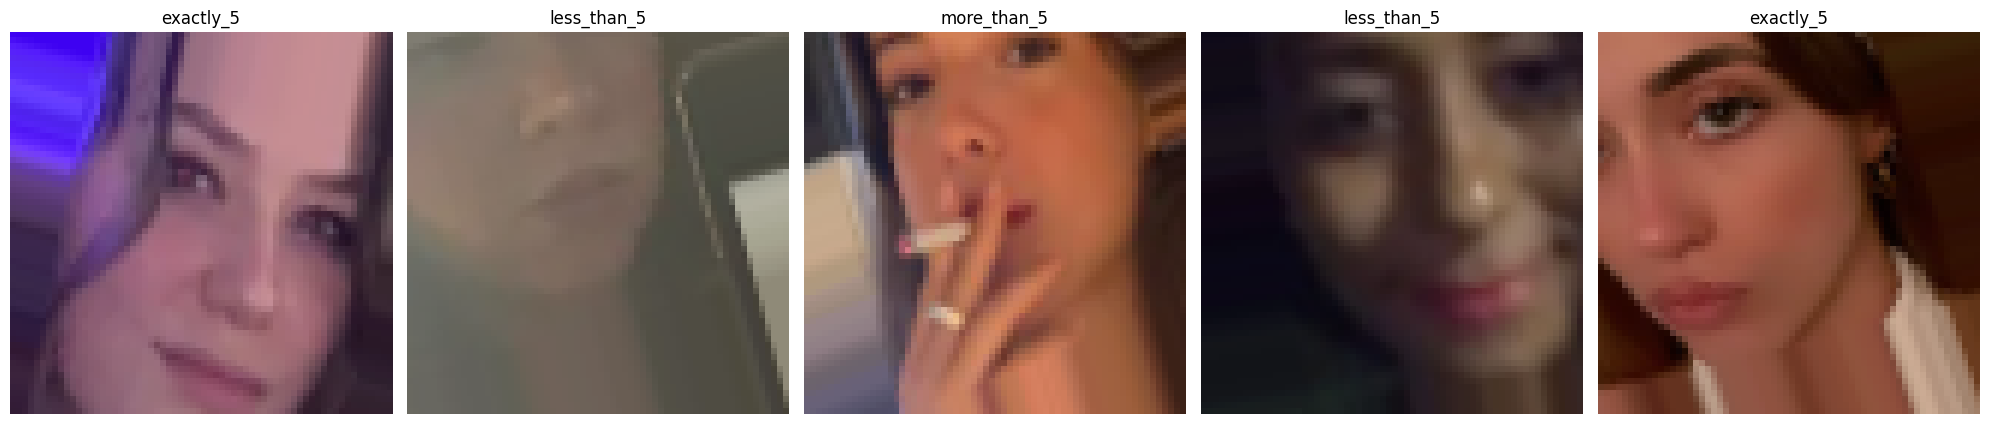

Validation images:


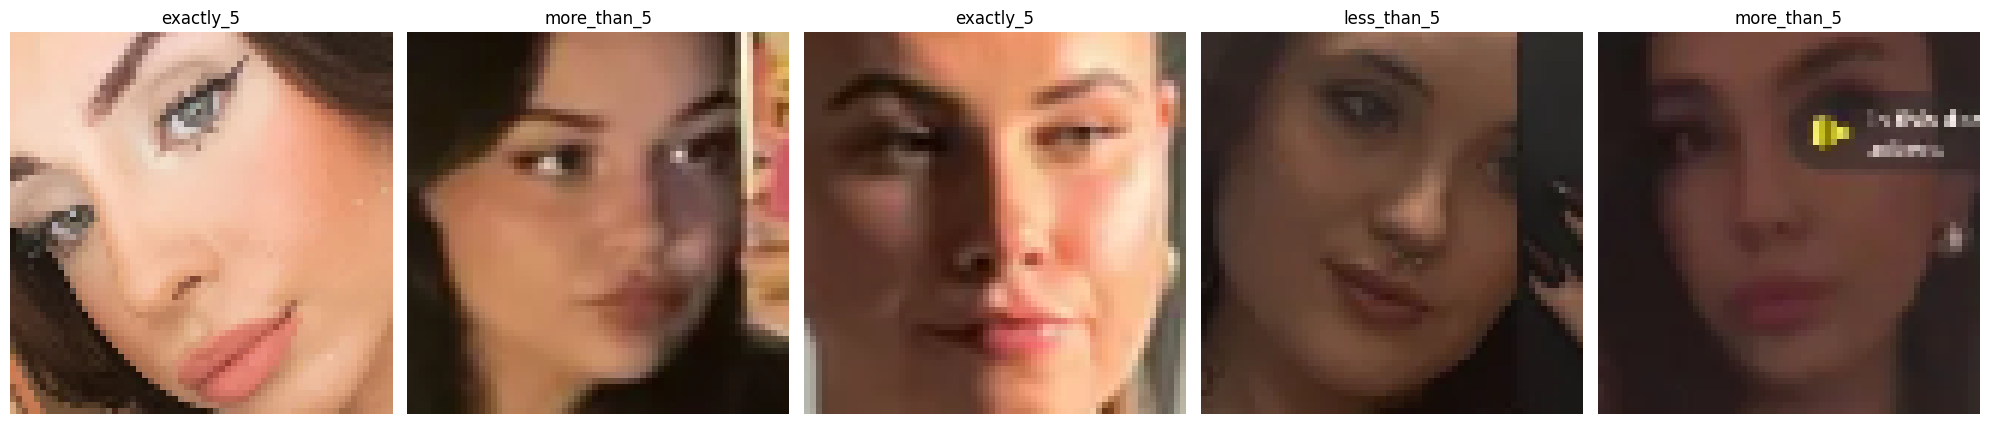

In [5]:
def plot_images(images_arr, labels, class_names):
    fig, axes = plt.subplots(1, len(images_arr), figsize=(20, 20))
    axes = axes.flatten()
    for img, ax, label in zip(images_arr, axes, labels):
        ax.imshow(img)
        ax.axis('off')
        ax.set_title(class_names[label.argmax()])
    plt.tight_layout()
    plt.show()

# Paths to your dataset
train_dir = 'training_data/ratings_female_simplified'  # Replace with the path to your training data directory
val_dir = 'testing_data/ratings_female_simplified'  # Replace with the path to your validation data directory

# Create data generators
train_generator, val_generator = create_data_generators(train_dir, val_dir)

# Get a batch of training data
train_images, train_labels = next(train_generator)
# Plot training images
print("Training images:")
plot_images(train_images[5:10], train_labels[5:10], list(train_generator.class_indices.keys()))

# Get a batch of validation data
val_images, val_labels = next(val_generator)
# Plot validation images
print("Validation images:")
plot_images(val_images[:5], val_labels[:5], list(val_generator.class_indices.keys()))


In [112]:
# Create the model
model = create_network_2()

# Example usage:
train_dir = 'training_data/ratings_female_simplified'
val_dir = 'testing_data/ratings_female_simplified'
train_gen, val_gen = create_data_generators(train_dir, val_dir)

# Fit the model
history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=10,  # Number of epochs to train for
    verbose=1  # Verbosity mode
)

Model: "sequential_39"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_148 (Conv2D)         (None, 30, 30, 10)        280       
                                                                 
 conv2d_149 (Conv2D)         (None, 28, 28, 10)        910       
                                                                 
 max_pooling2d_89 (MaxPoolin  (None, 14, 14, 10)       0         
 g2D)                                                            
                                                                 
 conv2d_150 (Conv2D)         (None, 12, 12, 10)        910       
                                                                 
 conv2d_151 (Conv2D)         (None, 10, 10, 10)        910       
                                                                 
 max_pooling2d_90 (MaxPoolin  (None, 5, 5, 10)         0         
 g2D)                                                

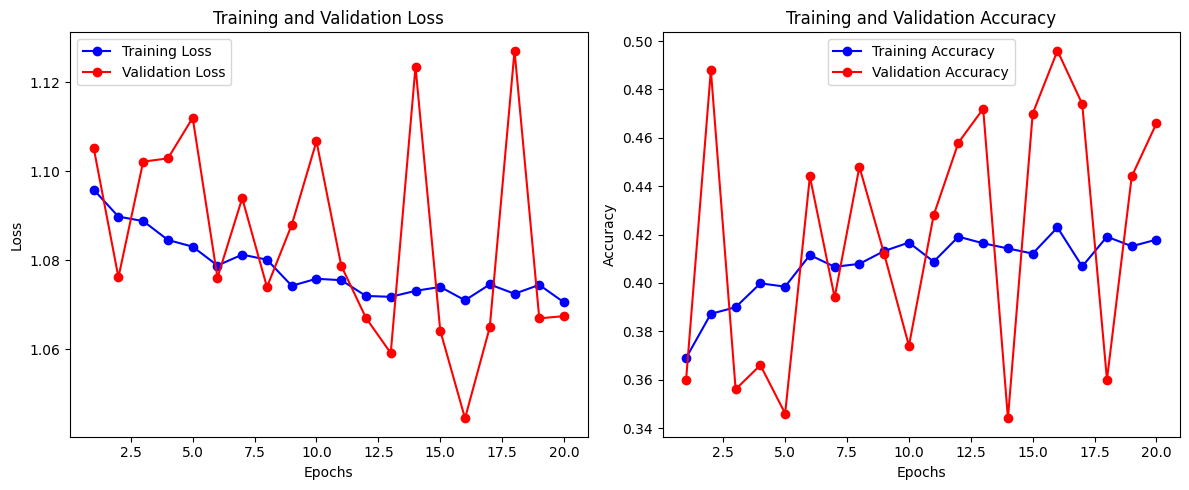

In [118]:
plot_training_history(history) # 0.05 LR

Model: "sequential_41"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_156 (Conv2D)         (None, 30, 30, 10)        280       
                                                                 
 conv2d_157 (Conv2D)         (None, 28, 28, 10)        910       
                                                                 
 max_pooling2d_93 (MaxPoolin  (None, 14, 14, 10)       0         
 g2D)                                                            
                                                                 
 conv2d_158 (Conv2D)         (None, 12, 12, 10)        910       
                                                                 
 conv2d_159 (Conv2D)         (None, 10, 10, 10)        910       
                                                                 
 max_pooling2d_94 (MaxPoolin  (None, 5, 5, 10)         0         
 g2D)                                                

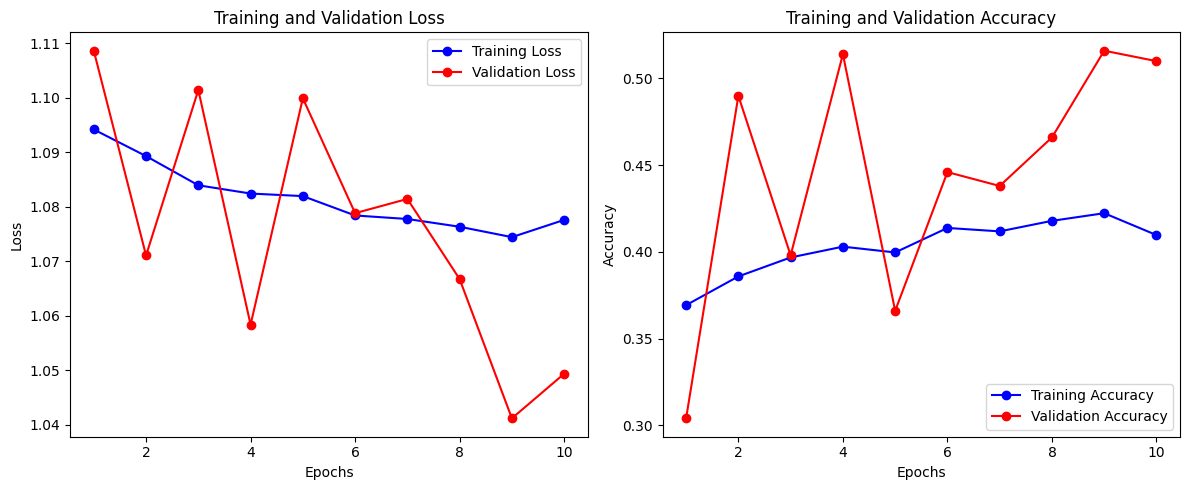

In [120]:
# Create the model
model = create_network_2()

# Example usage:
train_dir = 'training_data/ratings_female_simplified'
val_dir = 'testing_data/ratings_female_simplified'
train_gen, val_gen = create_data_generators(train_dir, val_dir)

# Fit the model
history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=10,  # Number of epochs to train for
    verbose=1  # Verbosity mode
)

plot_training_history(history) # LR: 0.01


In [121]:
model.save('model_0.01.h5')

Model: "sequential_44"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_168 (Conv2D)         (None, 30, 30, 10)        280       
                                                                 
 conv2d_169 (Conv2D)         (None, 28, 28, 10)        910       
                                                                 
 max_pooling2d_99 (MaxPoolin  (None, 14, 14, 10)       0         
 g2D)                                                            
                                                                 
 conv2d_170 (Conv2D)         (None, 12, 12, 10)        910       
                                                                 
 conv2d_171 (Conv2D)         (None, 10, 10, 10)        910       
                                                                 
 max_pooling2d_100 (MaxPooli  (None, 5, 5, 10)         0         
 ng2D)                                               

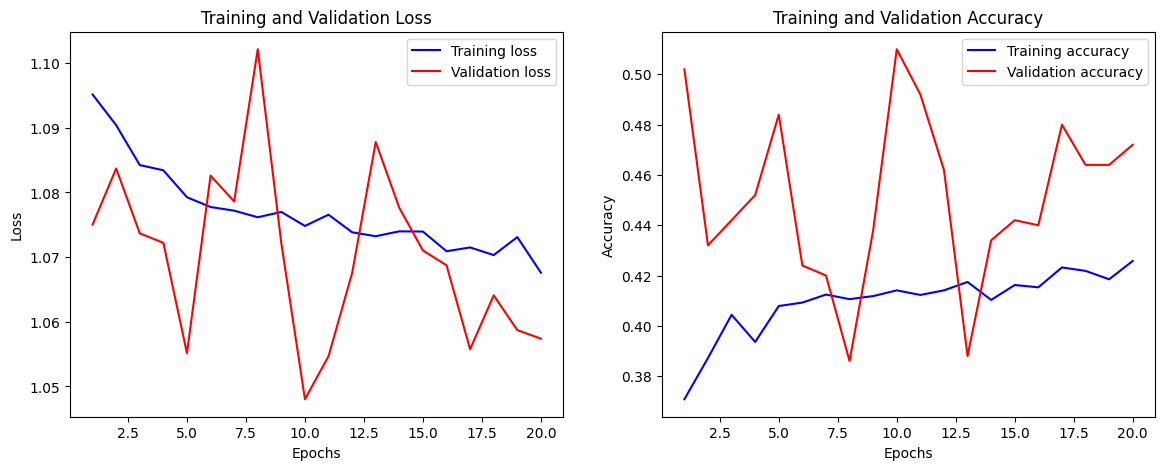

Epoch 1/20
206/206 [==============================] - 48s 235ms/step - loss: 1.0701 - categorical_accuracy: 0.4199 - val_loss: 1.0705 - val_categorical_accuracy: 0.4500
Epoch 2/20
206/206 [==============================] - 48s 232ms/step - loss: 1.0689 - categorical_accuracy: 0.4246 - val_loss: 1.1069 - val_categorical_accuracy: 0.3520
Epoch 3/20
206/206 [==============================] - 49s 236ms/step - loss: 1.0690 - categorical_accuracy: 0.4190 - val_loss: 1.0519 - val_categorical_accuracy: 0.4780
Epoch 4/20
206/206 [==============================] - 50s 243ms/step - loss: 1.0673 - categorical_accuracy: 0.4234 - val_loss: 1.0564 - val_categorical_accuracy: 0.4560
Epoch 5/20
206/206 [==============================] - 47s 228ms/step - loss: 1.0665 - categorical_accuracy: 0.4285 - val_loss: 1.1227 - val_categorical_accuracy: 0.3440
Epoch 6/20
206/206 [==============================] - 49s 240ms/step - loss: 1.0684 - categorical_accuracy: 0.4170 - val_loss: 1.0531 - val_categorical_acc

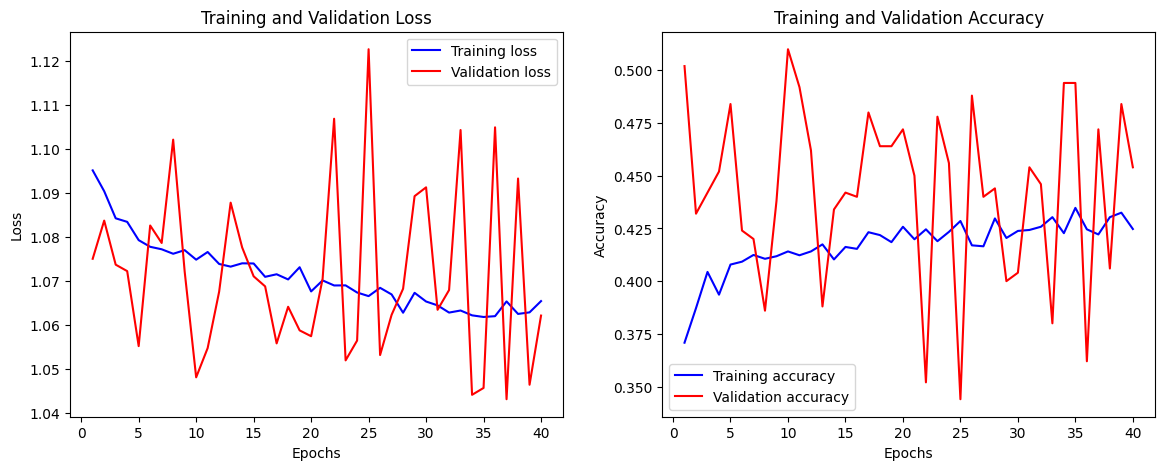

Epoch 1/20
206/206 [==============================] - 50s 241ms/step - loss: 1.0618 - categorical_accuracy: 0.4267 - val_loss: 1.0454 - val_categorical_accuracy: 0.4740
Epoch 2/20
206/206 [==============================] - 51s 248ms/step - loss: 1.0603 - categorical_accuracy: 0.4311 - val_loss: 1.0703 - val_categorical_accuracy: 0.4420
Epoch 3/20
206/206 [==============================] - 47s 228ms/step - loss: 1.0613 - categorical_accuracy: 0.4258 - val_loss: 1.0716 - val_categorical_accuracy: 0.4380
Epoch 4/20
206/206 [==============================] - 49s 238ms/step - loss: 1.0597 - categorical_accuracy: 0.4285 - val_loss: 1.0566 - val_categorical_accuracy: 0.4580
Epoch 5/20
206/206 [==============================] - 49s 238ms/step - loss: 1.0630 - categorical_accuracy: 0.4278 - val_loss: 1.0561 - val_categorical_accuracy: 0.4620
Epoch 6/20
206/206 [==============================] - 49s 238ms/step - loss: 1.0567 - categorical_accuracy: 0.4357 - val_loss: 1.0334 - val_categorical_acc

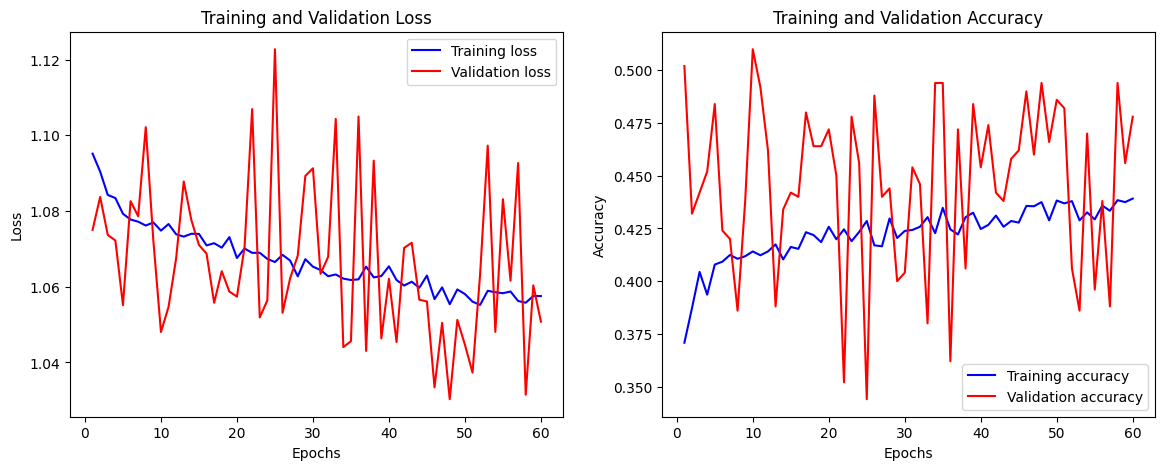

Epoch 1/20
206/206 [==============================] - 49s 238ms/step - loss: 1.0572 - categorical_accuracy: 0.4335 - val_loss: 1.0487 - val_categorical_accuracy: 0.4620
Epoch 2/20
206/206 [==============================] - 50s 245ms/step - loss: 1.0545 - categorical_accuracy: 0.4414 - val_loss: 1.0722 - val_categorical_accuracy: 0.4220
Epoch 3/20
206/206 [==============================] - 49s 240ms/step - loss: 1.0575 - categorical_accuracy: 0.4357 - val_loss: 1.0444 - val_categorical_accuracy: 0.4760
Epoch 4/20
206/206 [==============================] - 49s 240ms/step - loss: 1.0559 - categorical_accuracy: 0.4419 - val_loss: 1.0863 - val_categorical_accuracy: 0.4200
Epoch 5/20
206/206 [==============================] - 52s 252ms/step - loss: 1.0538 - categorical_accuracy: 0.4402 - val_loss: 1.0511 - val_categorical_accuracy: 0.4740
Epoch 6/20
206/206 [==============================] - 49s 239ms/step - loss: 1.0555 - categorical_accuracy: 0.4387 - val_loss: 1.0630 - val_categorical_acc

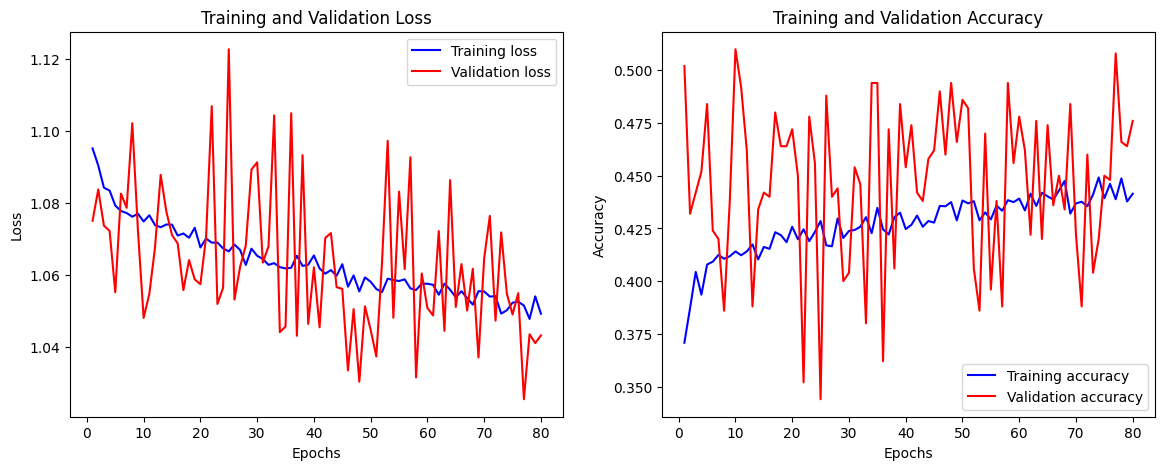

Epoch 1/20
206/206 [==============================] - 50s 242ms/step - loss: 1.0522 - categorical_accuracy: 0.4364 - val_loss: 1.0512 - val_categorical_accuracy: 0.4460
Epoch 2/20
206/206 [==============================] - 44s 213ms/step - loss: 1.0503 - categorical_accuracy: 0.4410 - val_loss: 1.0673 - val_categorical_accuracy: 0.4180
Epoch 3/20
206/206 [==============================] - 50s 242ms/step - loss: 1.0501 - categorical_accuracy: 0.4454 - val_loss: 1.0466 - val_categorical_accuracy: 0.4800
Epoch 4/20
206/206 [==============================] - 47s 229ms/step - loss: 1.0505 - categorical_accuracy: 0.4408 - val_loss: 1.0722 - val_categorical_accuracy: 0.4020
Epoch 5/20
206/206 [==============================] - 49s 240ms/step - loss: 1.0512 - categorical_accuracy: 0.4407 - val_loss: 1.0353 - val_categorical_accuracy: 0.4920
Epoch 6/20
206/206 [==============================] - 48s 232ms/step - loss: 1.0497 - categorical_accuracy: 0.4463 - val_loss: 1.0581 - val_categorical_acc

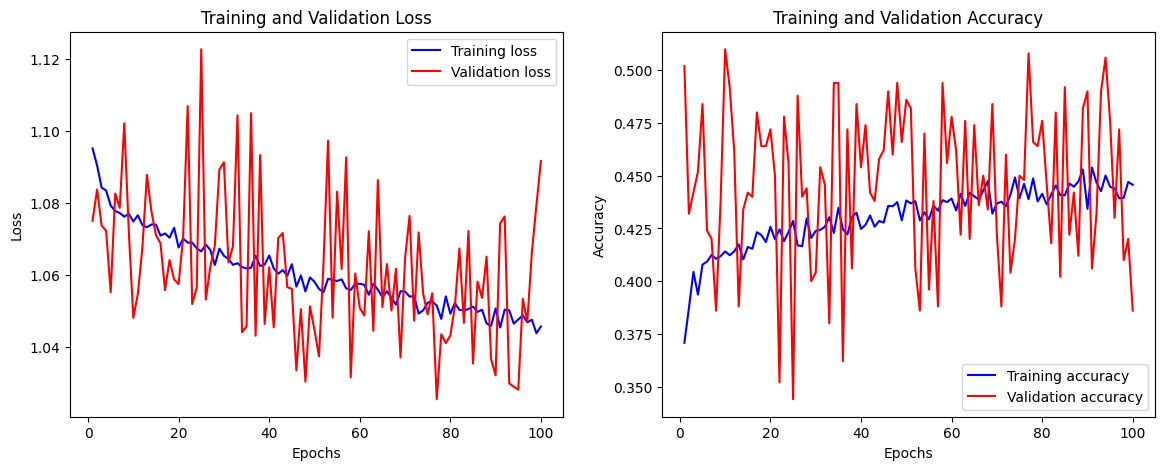

Epoch 1/20
206/206 [==============================] - 49s 238ms/step - loss: 1.0442 - categorical_accuracy: 0.4478 - val_loss: 1.0534 - val_categorical_accuracy: 0.4740
Epoch 2/20
206/206 [==============================] - 48s 232ms/step - loss: 1.0502 - categorical_accuracy: 0.4460 - val_loss: 1.0448 - val_categorical_accuracy: 0.4500
Epoch 3/20
206/206 [==============================] - 51s 246ms/step - loss: 1.0437 - categorical_accuracy: 0.4527 - val_loss: 1.0527 - val_categorical_accuracy: 0.4460
Epoch 4/20
206/206 [==============================] - 47s 227ms/step - loss: 1.0497 - categorical_accuracy: 0.4463 - val_loss: 1.0357 - val_categorical_accuracy: 0.4640
Epoch 5/20
206/206 [==============================] - 47s 227ms/step - loss: 1.0472 - categorical_accuracy: 0.4428 - val_loss: 1.0841 - val_categorical_accuracy: 0.4060
Epoch 6/20
206/206 [==============================] - 50s 245ms/step - loss: 1.0427 - categorical_accuracy: 0.4521 - val_loss: 1.0410 - val_categorical_acc

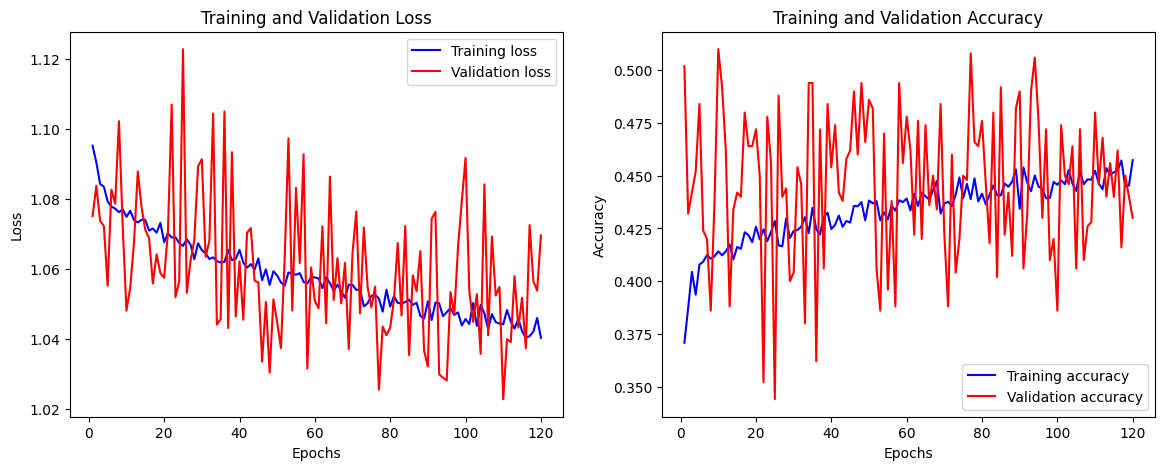

Epoch 1/20
206/206 [==============================] - 47s 228ms/step - loss: 1.0438 - categorical_accuracy: 0.4548 - val_loss: 1.0651 - val_categorical_accuracy: 0.4120
Epoch 2/20
206/206 [==============================] - 48s 232ms/step - loss: 1.0456 - categorical_accuracy: 0.4469 - val_loss: 1.0790 - val_categorical_accuracy: 0.4080
Epoch 3/20
206/206 [==============================] - 48s 232ms/step - loss: 1.0418 - categorical_accuracy: 0.4580 - val_loss: 1.0563 - val_categorical_accuracy: 0.4440
Epoch 4/20
206/206 [==============================] - 48s 233ms/step - loss: 1.0410 - categorical_accuracy: 0.4569 - val_loss: 1.0342 - val_categorical_accuracy: 0.4940
Epoch 5/20
206/206 [==============================] - 47s 226ms/step - loss: 1.0440 - categorical_accuracy: 0.4513 - val_loss: 1.0485 - val_categorical_accuracy: 0.4340
Epoch 6/20
206/206 [==============================] - 49s 240ms/step - loss: 1.0414 - categorical_accuracy: 0.4521 - val_loss: 1.0501 - val_categorical_acc

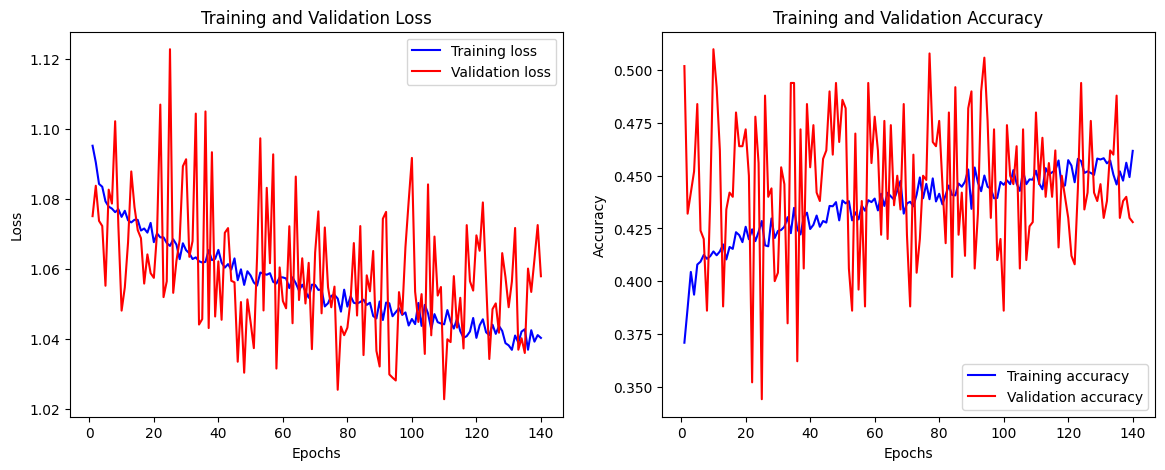

Epoch 1/20
206/206 [==============================] - 50s 243ms/step - loss: 1.0423 - categorical_accuracy: 0.4550 - val_loss: 1.0729 - val_categorical_accuracy: 0.4080
Epoch 2/20
206/206 [==============================] - 50s 245ms/step - loss: 1.0388 - categorical_accuracy: 0.4542 - val_loss: 1.0304 - val_categorical_accuracy: 0.4760
Epoch 3/20
206/206 [==============================] - 48s 232ms/step - loss: 1.0376 - categorical_accuracy: 0.4607 - val_loss: 1.0798 - val_categorical_accuracy: 0.4020
Epoch 4/20
206/206 [==============================] - 50s 244ms/step - loss: 1.0405 - categorical_accuracy: 0.4525 - val_loss: 1.0534 - val_categorical_accuracy: 0.4560
Epoch 5/20
206/206 [==============================] - 50s 242ms/step - loss: 1.0376 - categorical_accuracy: 0.4572 - val_loss: 1.0398 - val_categorical_accuracy: 0.4900
Epoch 6/20
206/206 [==============================] - 49s 239ms/step - loss: 1.0404 - categorical_accuracy: 0.4498 - val_loss: 1.0427 - val_categorical_acc

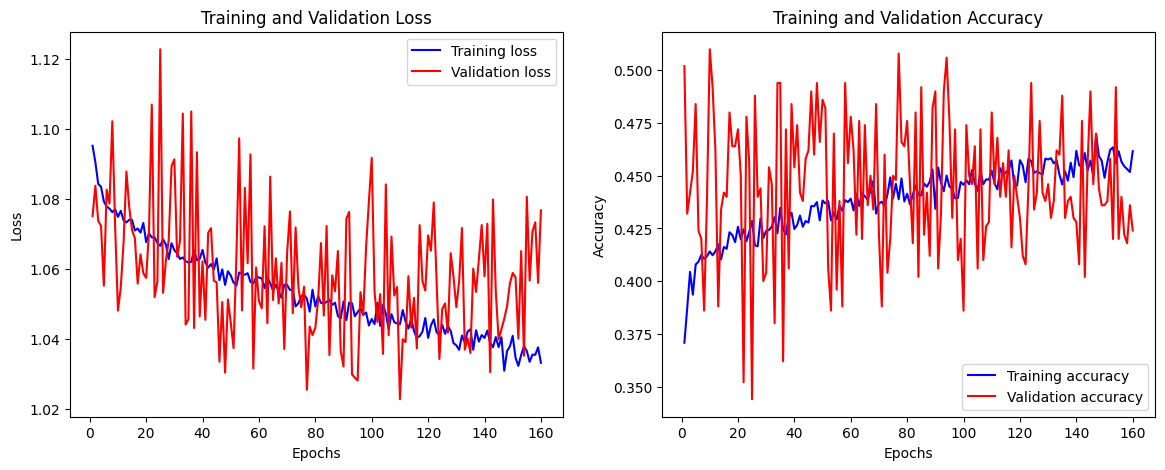

Epoch 1/20
206/206 [==============================] - 51s 247ms/step - loss: 1.0350 - categorical_accuracy: 0.4589 - val_loss: 1.0531 - val_categorical_accuracy: 0.4420
Epoch 2/20
206/206 [==============================] - 49s 239ms/step - loss: 1.0317 - categorical_accuracy: 0.4607 - val_loss: 1.0653 - val_categorical_accuracy: 0.4380
Epoch 3/20
206/206 [==============================] - 48s 233ms/step - loss: 1.0370 - categorical_accuracy: 0.4603 - val_loss: 1.0447 - val_categorical_accuracy: 0.4520
Epoch 4/20
206/206 [==============================] - 47s 230ms/step - loss: 1.0336 - categorical_accuracy: 0.4553 - val_loss: 1.0512 - val_categorical_accuracy: 0.4620
Epoch 5/20
206/206 [==============================] - 48s 231ms/step - loss: 1.0388 - categorical_accuracy: 0.4545 - val_loss: 1.0495 - val_categorical_accuracy: 0.4620
Epoch 6/20
206/206 [==============================] - 45s 218ms/step - loss: 1.0331 - categorical_accuracy: 0.4606 - val_loss: 1.0452 - val_categorical_acc

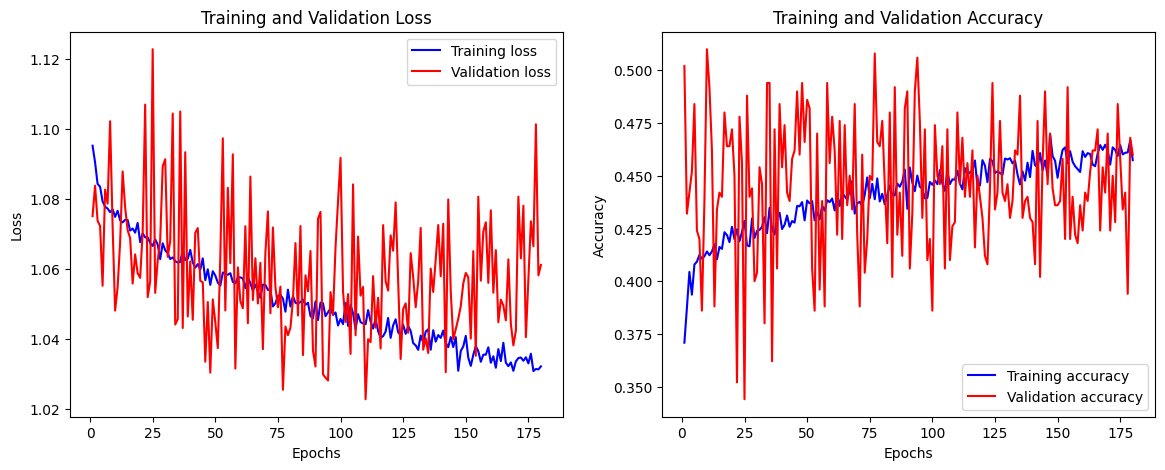

Epoch 1/20
206/206 [==============================] - 48s 233ms/step - loss: 1.0374 - categorical_accuracy: 0.4597 - val_loss: 1.0676 - val_categorical_accuracy: 0.4540
Epoch 2/20
206/206 [==============================] - 46s 224ms/step - loss: 1.0306 - categorical_accuracy: 0.4648 - val_loss: 1.0576 - val_categorical_accuracy: 0.4600
Epoch 3/20
206/206 [==============================] - 46s 224ms/step - loss: 1.0297 - categorical_accuracy: 0.4654 - val_loss: 1.0496 - val_categorical_accuracy: 0.4600
Epoch 4/20
206/206 [==============================] - 44s 216ms/step - loss: 1.0349 - categorical_accuracy: 0.4586 - val_loss: 1.0464 - val_categorical_accuracy: 0.4480
Epoch 5/20
206/206 [==============================] - 48s 233ms/step - loss: 1.0314 - categorical_accuracy: 0.4692 - val_loss: 1.0556 - val_categorical_accuracy: 0.4400
Epoch 6/20
206/206 [==============================] - 48s 232ms/step - loss: 1.0341 - categorical_accuracy: 0.4598 - val_loss: 1.0485 - val_categorical_acc

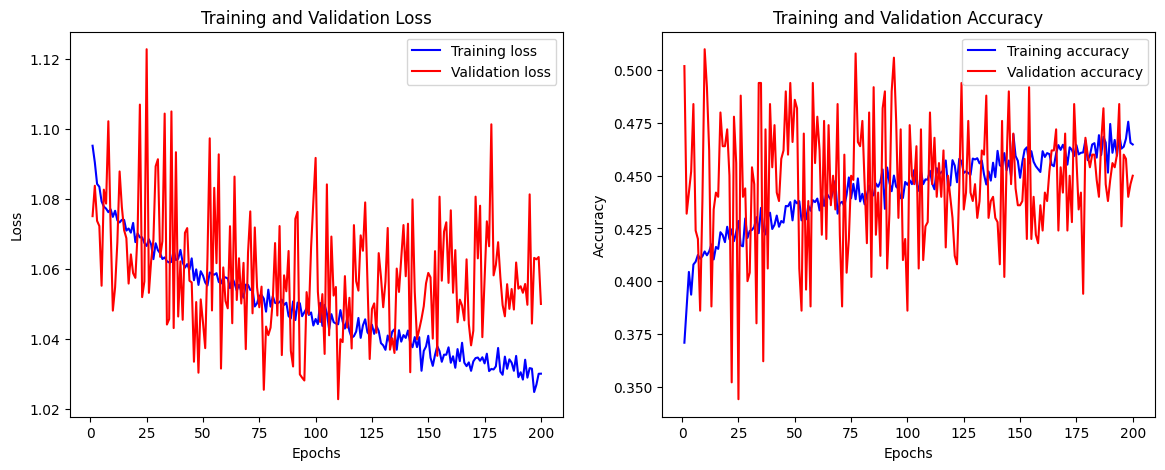

Epoch 1/20
111/206 [===============>..............] - ETA: 21s - loss: 1.0265 - categorical_accuracy: 0.4707

KeyboardInterrupt: 

In [126]:
# Create the model
model = create_network_2()

# Example usage:
train_dir = 'training_data/ratings_female_simplified'
val_dir = 'testing_data/ratings_female_simplified'
train_gen, val_gen = create_data_generators(train_dir, val_dir)

# Initialize lists to accumulate the history data
cumulative_train_loss = []
cumulative_val_loss = []
cumulative_train_acc = []
cumulative_val_acc = []

# Loop over multiple training sessions
for i in range(50):
    # Fit the model
    history = model.fit(
        train_gen,
        validation_data=val_gen,
        epochs=20,  # Number of epochs per loop iteration
        verbose=1   # Verbosity mode
    )

    # Accumulate the history data
    cumulative_train_loss.extend(history.history['loss'])
    cumulative_val_loss.extend(history.history['val_loss'])
    cumulative_train_acc.extend(history.history['categorical_accuracy'])
    cumulative_val_acc.extend(history.history['val_categorical_accuracy'])
    
    # Plot the cumulative training history after each training session
    plot_cumulative_training_history(cumulative_train_loss, cumulative_val_loss, cumulative_train_acc, cumulative_val_acc)
    
    # Save the model after each training session
    model.save(f'model_0.0001_{i}.h5')


Let's try adding dropout layers and then maybe L2 reguralization after this to avoid overfitting...

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 30, 30, 10)        280       
                                                                 
 conv2d_9 (Conv2D)           (None, 28, 28, 10)        910       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 14, 14, 10)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 12, 12, 10)        910       
                                                                 
 conv2d_11 (Conv2D)          (None, 10, 10, 10)        910       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 5, 5, 10)         0         
 2D)                                                  

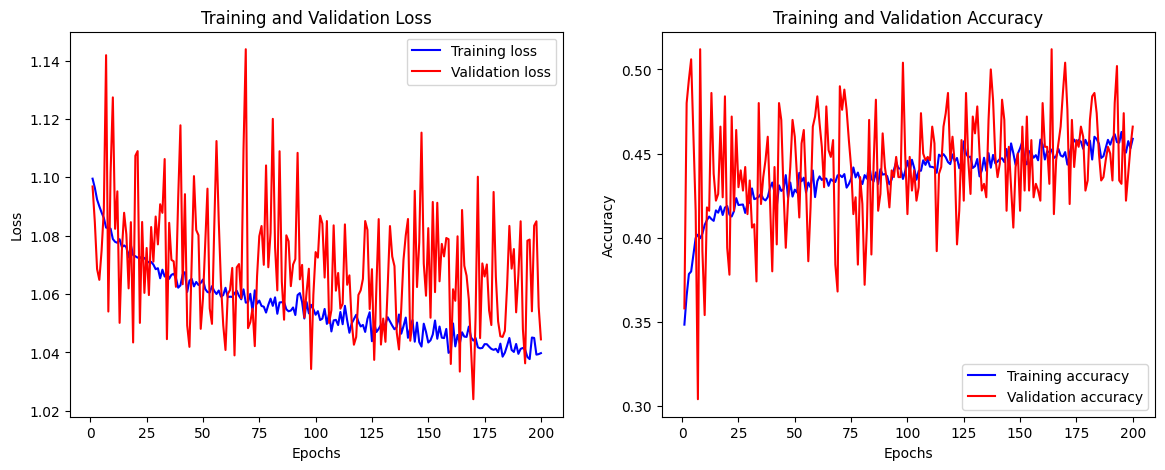

In [9]:
# Create the model
model = create_network_2()

# Example usage:
train_dir = 'training_data/ratings_female_simplified'
val_dir = 'testing_data/ratings_female_simplified'
train_gen, val_gen = create_data_generators(train_dir, val_dir)

# Initialize lists to accumulate the history data
cumulative_train_loss = []
cumulative_val_loss = []
cumulative_train_acc = []
cumulative_val_acc = []

# Loop over multiple training sessions
for i in range(10):
    # Fit the model
    history = model.fit(
        train_gen,
        validation_data=val_gen,
        epochs=20,  # Number of epochs per loop iteration
        verbose=1   # Verbosity mode
    )

    # Accumulate the history data
    cumulative_train_loss.extend(history.history['loss'])
    cumulative_val_loss.extend(history.history['val_loss'])
    cumulative_train_acc.extend(history.history['categorical_accuracy'])
    cumulative_val_acc.extend(history.history['val_categorical_accuracy'])
    
    # Save the model after each training session
    model.save(f'model_0.0001_dropout{i}.h5')
    
# Plot the cumulative training history after each training session
plot_cumulative_training_history(cumulative_train_loss, cumulative_val_loss, cumulative_train_acc, cumulative_val_acc)


Let's test what a lower amount of data does (80%)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 30, 30, 10)        280       
                                                                 
 conv2d_13 (Conv2D)          (None, 28, 28, 10)        910       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 14, 14, 10)       0         
 2D)                                                             
                                                                 
 conv2d_14 (Conv2D)          (None, 12, 12, 10)        910       
                                                                 
 conv2d_15 (Conv2D)          (None, 10, 10, 10)        910       
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 5, 5, 10)         0         
 2D)                                                  

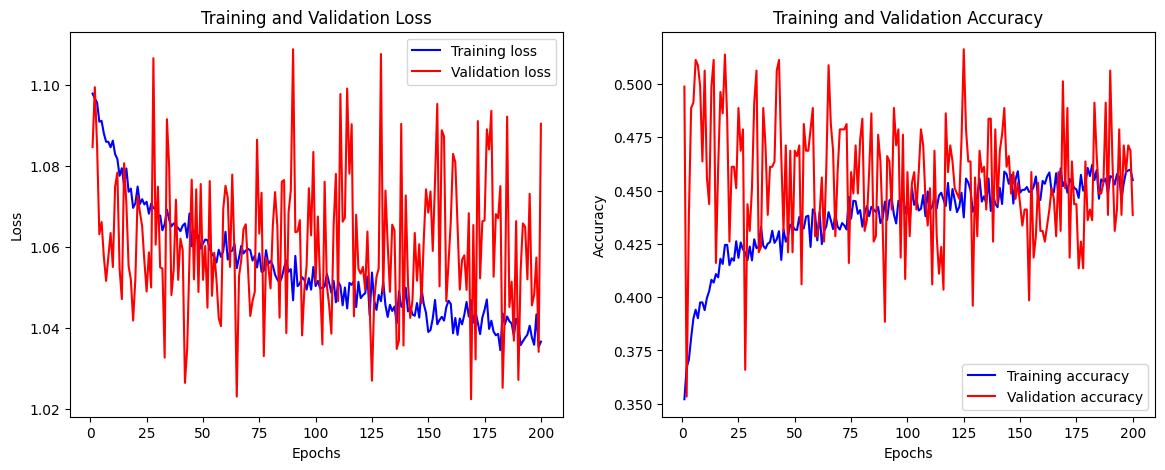

In [10]:
# Create the model
model = create_network_2()

# Example usage:
train_dir = 'training_data/ratings_female_simplified_80p'
val_dir = 'testing_data/ratings_female_simplified_80p'
train_gen, val_gen = create_data_generators(train_dir, val_dir)

# Initialize lists to accumulate the history data
cumulative_train_loss = []
cumulative_val_loss = []
cumulative_train_acc = []
cumulative_val_acc = []

# Loop over multiple training sessions
for i in range(10):
    # Fit the model
    history = model.fit(
        train_gen,
        validation_data=val_gen,
        epochs=20,  # Number of epochs per loop iteration
        verbose=1   # Verbosity mode
    )

    # Accumulate the history data
    cumulative_train_loss.extend(history.history['loss'])
    cumulative_val_loss.extend(history.history['val_loss'])
    cumulative_train_acc.extend(history.history['categorical_accuracy'])
    cumulative_val_acc.extend(history.history['val_categorical_accuracy'])
    
    # Save the model after each training session
    model.save(f'model_0.0001_dropout_80p{i}.h5')
    
# Plot the cumulative training history after each training session
plot_cumulative_training_history(cumulative_train_loss, cumulative_val_loss, cumulative_train_acc, cumulative_val_acc)


64x64, organized data better, added batch normalization, data standardization, reduced dense layer from 256 to 128

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 62, 62, 10)        280       
                                                                 
 conv2d_17 (Conv2D)          (None, 60, 60, 10)        910       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 30, 30, 10)       0         
 2D)                                                             
                                                                 
 batch_normalization (BatchN  (None, 30, 30, 10)       40        
 ormalization)                                                   
                                                                 
 conv2d_18 (Conv2D)          (None, 28, 28, 10)        910       
                                                                 
 conv2d_19 (Conv2D)          (None, 26, 26, 10)       

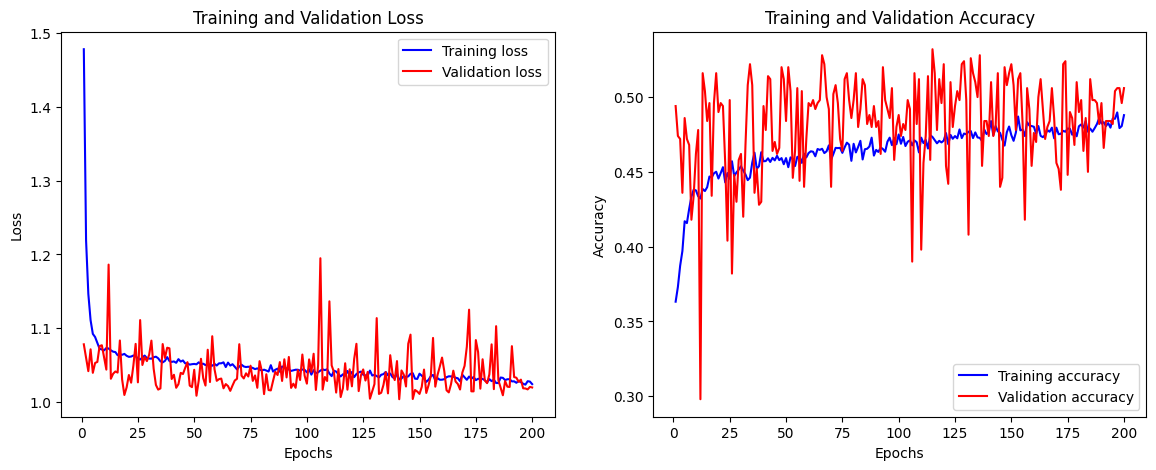

In [17]:
# Create the model
model = create_network_2()

# Example usage:
train_dir = 'training_data/ratings_female_simplified'
val_dir = 'testing_data/ratings_female_simplified'
train_gen, val_gen = create_data_generators(train_dir, val_dir)

# Initialize lists to accumulate the history data
cumulative_train_loss = []
cumulative_val_loss = []
cumulative_train_acc = []
cumulative_val_acc = []

# Loop over multiple training sessions
for i in range(10):
    # Fit the model
    history = model.fit(
        train_gen,
        validation_data=val_gen,
        epochs=20,  # Number of epochs per loop iteration
        verbose=1   # Verbosity mode
    )

    # Accumulate the history data
    cumulative_train_loss.extend(history.history['loss'])
    cumulative_val_loss.extend(history.history['val_loss'])
    cumulative_train_acc.extend(history.history['categorical_accuracy'])
    cumulative_val_acc.extend(history.history['val_categorical_accuracy'])
    
    # Save the model after each training session
    model.save(f'model_0.0005_dropout_oragnized{i}.h5')
    
# Plot the cumulative training history after each training session
plot_cumulative_training_history(cumulative_train_loss, cumulative_val_loss, cumulative_train_acc, cumulative_val_acc)


Epoch 1/20
206/206 [==============================] - 53s 255ms/step - loss: 1.0248 - categorical_accuracy: 0.4879 - val_loss: 1.0178 - val_categorical_accuracy: 0.5000
Epoch 2/20
206/206 [==============================] - 52s 255ms/step - loss: 1.0287 - categorical_accuracy: 0.4835 - val_loss: 1.0231 - val_categorical_accuracy: 0.4980
Epoch 3/20
206/206 [==============================] - 51s 249ms/step - loss: 1.0267 - categorical_accuracy: 0.4794 - val_loss: 1.0084 - val_categorical_accuracy: 0.5060
Epoch 4/20
206/206 [==============================] - 52s 254ms/step - loss: 1.0275 - categorical_accuracy: 0.4841 - val_loss: 1.0237 - val_categorical_accuracy: 0.4940
Epoch 5/20
206/206 [==============================] - 51s 248ms/step - loss: 1.0242 - categorical_accuracy: 0.4828 - val_loss: 1.0625 - val_categorical_accuracy: 0.4580
Epoch 6/20
206/206 [==============================] - 52s 254ms/step - loss: 1.0204 - categorical_accuracy: 0.4899 - val_loss: 1.0318 - val_categorical_acc

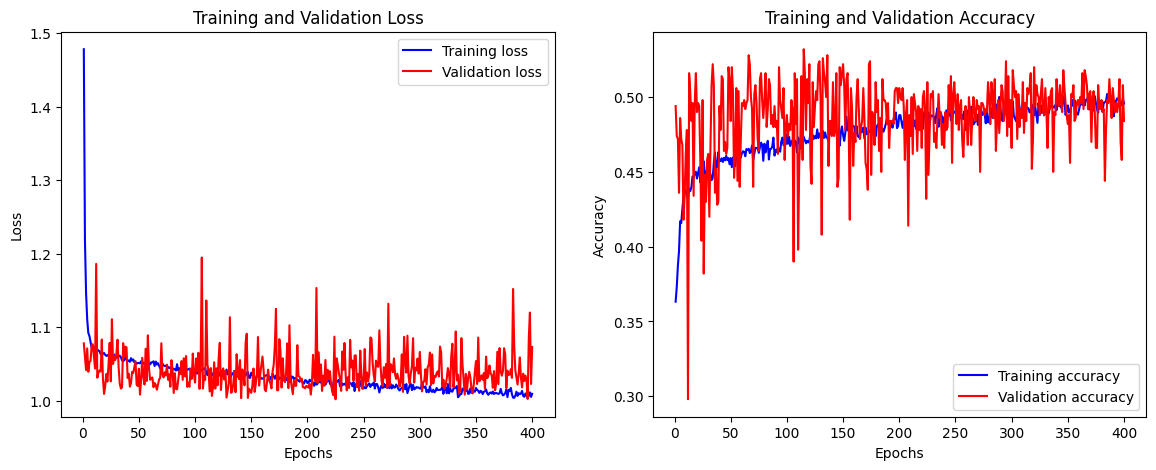

In [18]:
for i in range(10):
    # Fit the model
    history = model.fit(
        train_gen,
        validation_data=val_gen,
        epochs=20,  # Number of epochs per loop iteration
        verbose=1   # Verbosity mode
    )

    # Accumulate the history data
    cumulative_train_loss.extend(history.history['loss'])
    cumulative_val_loss.extend(history.history['val_loss'])
    cumulative_train_acc.extend(history.history['categorical_accuracy'])
    cumulative_val_acc.extend(history.history['val_categorical_accuracy'])
    
    # Save the model after each training session
    model.save(f'model_0.0005_dropout_oragnized{i+10}.h5')
    
# Plot the cumulative training history after each training session
plot_cumulative_training_history(cumulative_train_loss, cumulative_val_loss, cumulative_train_acc, cumulative_val_acc)

Let's try a larger learning rate, just so we can maybe cut down on training time for more experiements 0.0005 -> 0.005

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 10)        280       
                                                                 
 conv2d_1 (Conv2D)           (None, 60, 60, 10)        910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 30, 30, 10)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 30, 30, 10)       40        
 ormalization)                                                   
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 10)        910       
                                                                 
 conv2d_3 (Conv2D)           (None, 26, 26, 10)        9

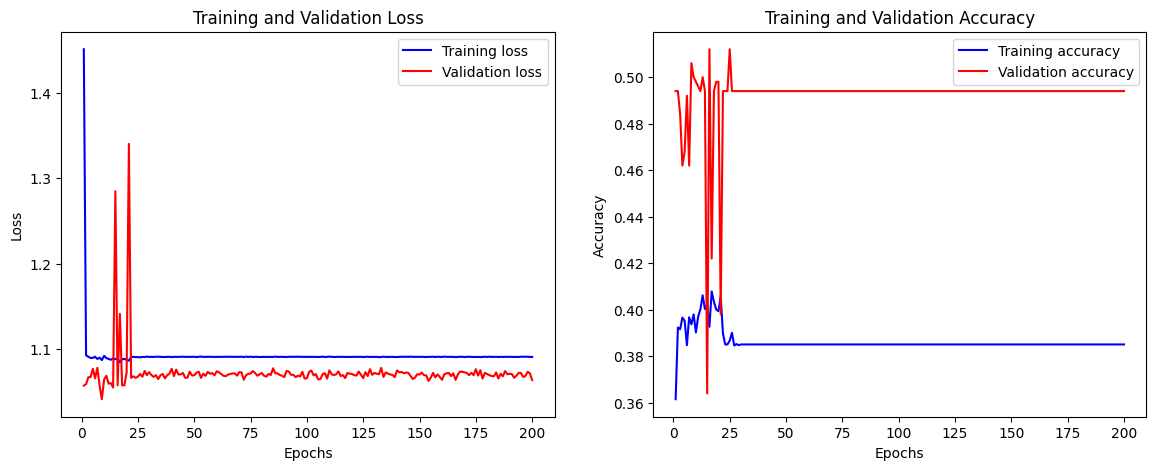

In [6]:
# Create the model
model = create_network_2()

# Example usage:
train_dir = 'training_data/ratings_female_simplified'
val_dir = 'testing_data/ratings_female_simplified'
train_gen, val_gen = create_data_generators(train_dir, val_dir)

# Initialize lists to accumulate the history data
cumulative_train_loss = []
cumulative_val_loss = []
cumulative_train_acc = []
cumulative_val_acc = []

# Loop over multiple training sessions
for i in range(10):
    # Fit the model
    history = model.fit(
        train_gen,
        validation_data=val_gen,
        epochs=20,  # Number of epochs per loop iteration
        verbose=1   # Verbosity mode
    )

    # Accumulate the history data
    cumulative_train_loss.extend(history.history['loss'])
    cumulative_val_loss.extend(history.history['val_loss'])
    cumulative_train_acc.extend(history.history['categorical_accuracy'])
    cumulative_val_acc.extend(history.history['val_categorical_accuracy'])
    
    # Save the model after each training session
    model.save(f'model_0.0005_dropout_oragnized{i}.h5')
    
# Plot the cumulative training history after each training session
plot_cumulative_training_history(cumulative_train_loss, cumulative_val_loss, cumulative_train_acc, cumulative_val_acc)


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 62, 62, 10)        280       
                                                                 
 conv2d_5 (Conv2D)           (None, 60, 60, 10)        910       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 10)       0         
 2D)                                                             
                                                                 
 batch_normalization_2 (Batc  (None, 30, 30, 10)       40        
 hNormalization)                                                 
                                                                 
 conv2d_6 (Conv2D)           (None, 28, 28, 10)        910       
                                                                 
 conv2d_7 (Conv2D)           (None, 26, 26, 10)       

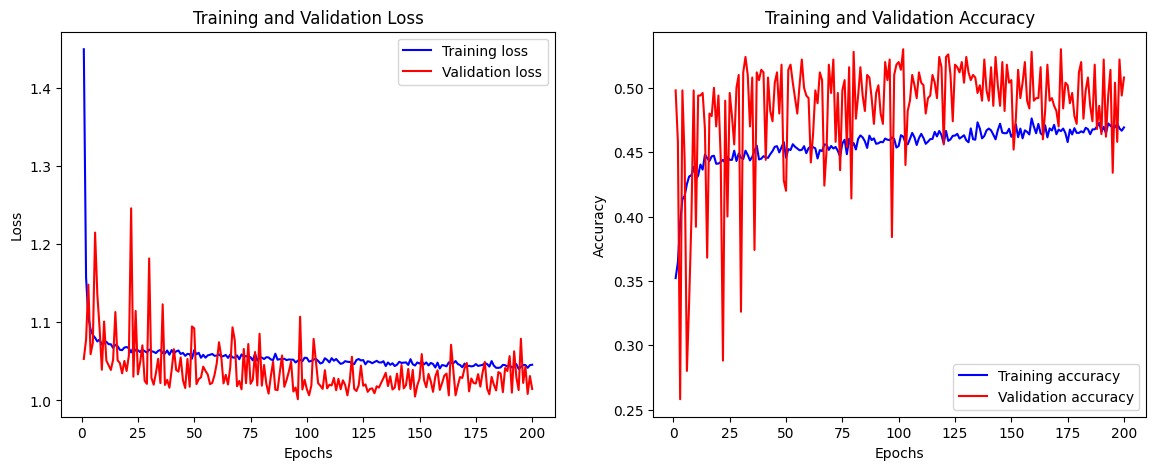

In [8]:
# Create the model
model = create_network_2()

# Example usage:
train_dir = 'training_data/ratings_female_simplified'
val_dir = 'testing_data/ratings_female_simplified'
train_gen, val_gen = create_data_generators(train_dir, val_dir)

# Initialize lists to accumulate the history data
cumulative_train_loss = []
cumulative_val_loss = []
cumulative_train_acc = []
cumulative_val_acc = []

# Loop over multiple training sessions
for i in range(10):
    # Fit the model
    history = model.fit(
        train_gen,
        validation_data=val_gen,
        epochs=20,  # Number of epochs per loop iteration
        verbose=1   # Verbosity mode
    )

    # Accumulate the history data
    cumulative_train_loss.extend(history.history['loss'])
    cumulative_val_loss.extend(history.history['val_loss'])
    cumulative_train_acc.extend(history.history['categorical_accuracy'])
    cumulative_val_acc.extend(history.history['val_categorical_accuracy'])
    
    # Save the model after each training session
    model.save(f'model_0.0005_dropout_oragnized{i}.h5')
    
# Plot the cumulative training history after each training session
plot_cumulative_training_history(cumulative_train_loss, cumulative_val_loss, cumulative_train_acc, cumulative_val_acc)


In [6]:
# Create the model
model = create_network_2()

# Example usage:
train_dir = 'training_data/ratings_female_simplified'
val_dir = 'testing_data/ratings_female_simplified'
train_gen, val_gen = create_data_generators(train_dir, val_dir)

# Initialize lists to accumulate the history data
cumulative_train_loss = []
cumulative_val_loss = []
cumulative_train_acc = []
cumulative_val_acc = []

# Loop over multiple training sessions
for i in range(100):
    # Fit the model
    history = model.fit(
        train_gen,
        validation_data=val_gen,
        epochs=50,  # Number of epochs per loop iteration
        verbose=1   # Verbosity mode
    )

    # Accumulate the history data
    cumulative_train_loss.extend(history.history['loss'])
    cumulative_val_loss.extend(history.history['val_loss'])
    cumulative_train_acc.extend(history.history['categorical_accuracy'])
    cumulative_val_acc.extend(history.history['val_categorical_accuracy'])
    
    # Save the model after each training session
    model.save(f'./model_0.0005_2_dropout_oragnized/{i}.h5')
    
# Plot the cumulative training history after each training session
plot_cumulative_training_history(cumulative_train_loss, cumulative_val_loss, cumulative_train_acc, cumulative_val_acc)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 10)        280       
                                                                 
 conv2d_1 (Conv2D)           (None, 60, 60, 10)        910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 30, 30, 10)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 30, 30, 10)       40        
 ormalization)                                                   
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 10)        910       
                                                                 
 conv2d_3 (Conv2D)           (None, 26, 26, 10)        9

KeyboardInterrupt: 